# Entrega Final -  Proyecto de Data Analytics con Python
**Alumno:** Duman Rodolfo Arruebarrena Ortega  
**Comisión:** 25262  
**Fecha:** 24/10/2025  

Este notebook desarrolla las etapas solicitadas en la entrega final del proyecto de Data Analytics:
- Etapa 1: Recopilación y preparación de datos
- Etapa 2: Procesamiento y limpieza de datos
- Etapa 3: Análisis de datos
- Etapa 4: Visualización de datos


# Etapa 1. Recopilación y Preparación de Datos

## Etapa 1.1. Importación de librerías
Se importan las librerías necesarias para el análisis de datos.

In [ ]:
import pandas as pd
import numpy as np


## Etapa 1.2. Montaje del Drive para tener acceso a los Datasets

1.   Elemento de lista
2.   Elemento de lista


Se indica la ubicación de los datasets con los que se trabajará.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Etapa 1.3. Carga de los datasets
Los archivos utilizados son:
- `Copia de ventas`
- `Copia de clientes`
- `Copia de marketing`

> Los datasets **no se incluyen en GitHub**, pero se asume que están en el mismo directorio del notebook al momento de la ejecución.


In [ ]:
import pandas as pd

ruta_base = r"/content/drive/MyDrive/Arruebarrena Ortega, Duman Rodolfo - Comisión 25262 - TPI Data Analytics/"

df_ventas = pd.read_excel(ruta_base + "Copia de ventas.xlsx")
df_clientes = pd.read_excel(ruta_base + "Copia de clientes.xlsx")
df_marketing = pd.read_excel(ruta_base + "Copia de marketing.xlsx")

print(df_ventas.shape, df_clientes.shape, df_marketing.shape)


(3035, 6) (567, 5) (90, 6)


## Etapa 2. Procesamiento y Limpieza de Datos

## Etapa 2.1. Limpieza de datos

En esta etapa se corrigen los posibles problemas identificados en el análisis exploratorio, tales como:
- Eliminación de registros duplicados.
- Tratamiento de valores nulos.
- Conversión de tipos de datos incorrectos.
- Creación de nuevas columnas derivadas (por ejemplo, *importe total*).

> El objetivo es dejar los tres datasets limpios y listos para análisis posteriores.


In [ ]:
# Copiamos los datasets originales para no modificarlos accidentalmente
ventas = df_ventas.copy()
clientes = df_clientes.copy()
marketing = df_marketing.copy()

# 1️⃣ Eliminar duplicados
ventas.drop_duplicates(inplace=True)
clientes.drop_duplicates(inplace=True)
marketing.drop_duplicates(inplace=True)

# 2️⃣ Revisar y eliminar nulos en columnas críticas
ventas.dropna(subset=["precio", "cantidad", "fecha_venta"], inplace=True)
clientes.dropna(subset=["id_cliente"], inplace=True)
marketing.dropna(subset=["producto"], inplace=True)

# 3️⃣ Asegurar tipos correctos
ventas["precio"] = pd.to_numeric(ventas["precio"], errors="coerce")
ventas["cantidad"] = pd.to_numeric(ventas["cantidad"], errors="coerce")
ventas["fecha_venta"] = pd.to_datetime(ventas["fecha_venta"], errors="coerce")

marketing["fecha_inicio"] = pd.to_datetime(marketing["fecha_inicio"], errors="coerce")
marketing["fecha_fin"] = pd.to_datetime(marketing["fecha_fin"], errors="coerce")

# 4️⃣ Crear una nueva columna: importe total (precio * cantidad)
ventas["importe"] = ventas["precio"] * ventas["cantidad"]

# 5️⃣ Mostrar resultados del proceso
print("Ventas limpias:", ventas.shape)
print("Clientes limpios:", clientes.shape)
print("Marketing limpio:", marketing.shape)



Ventas limpias: (2998, 7)
Clientes limpios: (567, 5)
Marketing limpio: (90, 6)


### Observaciones sobre la limpieza

- Se eliminaron registros duplicados en los tres datasets.
- En `ventas`, se descartaron algunas filas con valores nulos en `precio`, `cantidad` o `fecha_venta`.
- Se crearon nuevas variables derivadas:
  - `importe`: representa el valor total de cada venta.
- Todas las columnas de fechas fueron convertidas al formato `datetime64`.
- Los datasets ahora se encuentran consistentes y listos para el análisis.


In [ ]:
#Validación Final - Para verificar si todo quedó correcto

ventas.info()
print("\nValores nulos por columna:\n", ventas.isna().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 2998 entries, 0 to 3034
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_venta     2998 non-null   int64         
 1   producto     2998 non-null   object        
 2   precio       2998 non-null   float64       
 3   cantidad     2998 non-null   float64       
 4   fecha_venta  2998 non-null   datetime64[ns]
 5   categoria    2998 non-null   object        
 6   importe      2998 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 187.4+ KB

Valores nulos por columna:
 id_venta       0
producto       0
precio         0
cantidad       0
fecha_venta    0
categoria      0
importe        0
dtype: int64


## Etapa 2.2. Transformación y análisis de datos

En esta etapa se crean nuevas variables y se realizan transformaciones sobre los datos limpios.
El objetivo es identificar tendencias de venta, productos más relevantes y patrones de comportamiento.

Entre las operaciones que se realizan:
- Cálculo del importe total y ventas mensuales.
- Agrupación por categoría y producto.
- Identificación de productos de alto rendimiento.


In [ ]:
#Cálculo de Ventas Mensuales

# Asegurarse de que la columna fecha esté en formato datetime
ventas["fecha_venta"] = pd.to_datetime(ventas["fecha_venta"], errors="coerce")

# Crear columna año-mes (formato AAAA-MM)
ventas["year_month"] = ventas["fecha_venta"].dt.to_period("M").astype(str)

# Agrupar por mes y calcular ventas totales
ventas_mensuales = ventas.groupby("year_month")["importe"].sum().reset_index()

# Ordenar cronológicamente
ventas_mensuales = ventas_mensuales.sort_values("year_month")

# Mostrar resultado
display(ventas_mensuales.head(10))


,year_month,importe
0,2024-01,129604.99
1,2024-02,118672.44
2,2024-03,136779.15
3,2024-04,128430.69
4,2024-05,143727.25
5,2024-06,108480.17
6,2024-07,116229.97
7,2024-08,119680.15
8,2024-09,115787.85
9,2024-10,112117.13


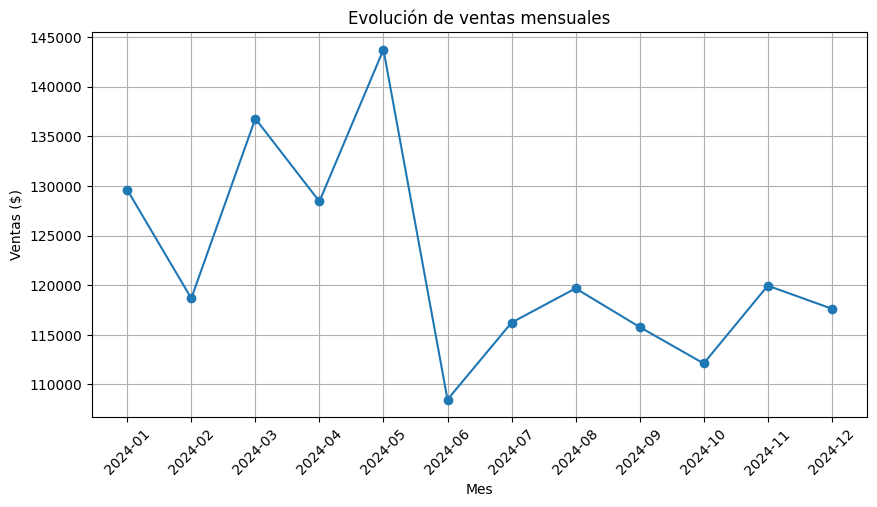

In [ ]:
#Gráfico de Ventas Mensuales

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(ventas_mensuales["year_month"], ventas_mensuales["importe"], marker="o")
plt.title("Evolución de ventas mensuales")
plt.xlabel("Mes")
plt.ylabel("Ventas ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
#Ventas por Categoría

ventas_por_categoria = ventas.groupby("categoria").agg({
    "importe": "sum",
    "cantidad": "sum"
}).reset_index().sort_values("importe", ascending=False)

display(ventas_por_categoria)


,categoria,importe,cantidad
1,Electrodomésticos,505299.63,6592.0
2,Electrónica,482577.80,6413.0
0,Decoración,479216.09,6490.0


In [ ]:
#Productos de alto rendimiento

# Agrupar por producto
resumen_productos = ventas.groupby("producto").agg({
    "importe": "sum",
    "cantidad": "sum",
    "id_venta": "count"
}).rename(columns={"id_venta": "n_transacciones"}).reset_index()

# Determinar el percentil 75 (top 25%)
umbral = resumen_productos["importe"].quantile(0.75)

# Filtrar productos de alto rendimiento
productos_top = resumen_productos[resumen_productos["importe"] > umbral].sort_values("importe", ascending=False)

display(productos_top.head(10))


,producto,importe,cantidad,n_transacciones
19,Lámpara de mesa,82276.38,1112.0,176
3,Auriculares,74175.58,958.0,143
20,Microondas,72562.89,912.0,135
5,Cafetera,59607.31,765.0,117
9,Cuadro decorativo,54297.60,726.0,100
27,Smartphone,54132.44,665.0,101
25,Secadora,52115.45,696.0,100
16,Jarrón decorativo,51130.88,672.0,100


## Etapa 2.3. Agregación:

Se genera un resumen de ventas por categoría de producto y se analizan los ingresos generados.

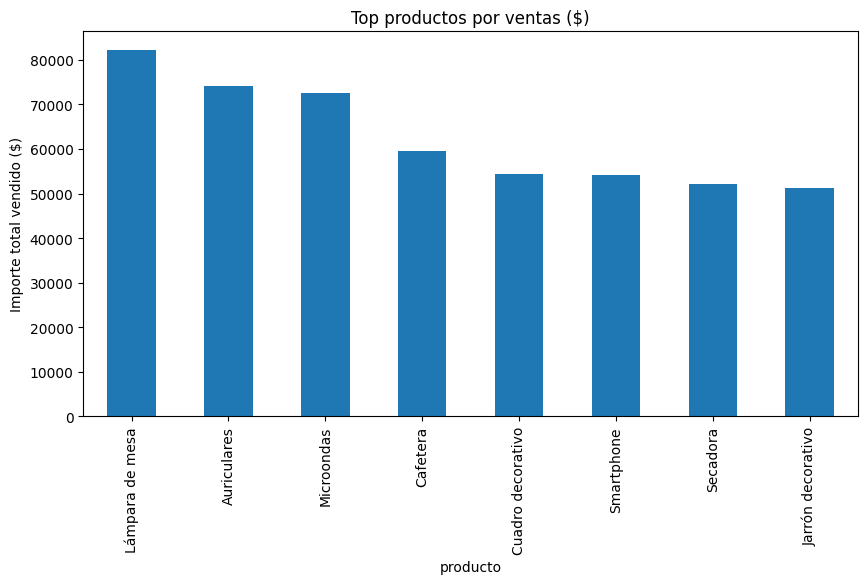

In [ ]:
#Visualizar los productos más vendidos

productos_top.head(10).plot(
    x="producto",
    y="importe",
    kind="bar",
    figsize=(10,5),
    title="Top productos por ventas ($)",
    legend=False
)
plt.ylabel("Importe total vendido ($)")
plt.show()


### Conclusiones del análisis inicial

- Las ventas muestran una tendencia estable con picos en determinados meses (Enero, Marzo y Mayo).
- Las categorías más fuertes en ventas son: (Electrodomésticos, Electrónica y Decoración).
- Los 8 productos más vendidos los hemos llamado "de alto rendimiento", porque representan el 25% superior del total de ventas.
- Se observa una concentración de ingresos en pocas referencias, lo que sugiere enfocar las campañas de marketing en estos productos.


## Etapa 2.4. Integración de datos: Ventas y Marketing

En esta sección se integran los datasets de ventas y marketing con el objetivo de analizar la relación entre el desempeño comercial y las inversiones publicitarias.

Las tareas que se realizan incluyen:
- Unión de ambos datasets por la columna `producto`.
- Cálculo del ROI (Retorno sobre la Inversión) por producto.
- Identificación de campañas más efectivas según las ventas generadas.


In [ ]:
#Unir Ventas y Marketing

# Asegurarse de que la columna 'producto' exista en ambos
print("Columnas de ventas:", ventas.columns)
print("Columnas de marketing:", marketing.columns)

# Realizar merge (izquierda: todos los productos de ventas)
ventas_marketing = ventas.merge(
    marketing[["producto", "canal", "costo", "fecha_inicio", "fecha_fin"]],
    on="producto",
    how="left",
    suffixes=("_venta", "_camp")
)

display(ventas_marketing.head(10))

#Qué hace este merge:
#Une cada venta con los datos de la campaña del mismo producto (si existe).
#Si un producto no tuvo campaña, los valores de marketing quedarán en NaN.

Columnas de ventas: Index(['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta',
       'categoria', 'importe', 'year_month'],
      dtype='object')
Columnas de marketing: Index(['id_campanha', 'producto', 'canal', 'costo', 'fecha_inicio',
       'fecha_fin'],
      dtype='object')


,id_venta,producto,precio,cantidad,fecha_venta,categoria,importe,year_month,canal,costo,fecha_inicio,fecha_fin
0,792,Cuadro decorativo,69.94,5.0,2024-01-02,Decoración,349.70,2024-01,RRSS,5.27,2024-04-27,2024-06-04
1,792,Cuadro decorativo,69.94,5.0,2024-01-02,Decoración,349.70,2024-01,Email,5.28,2024-08-15,2024-09-12
2,792,Cuadro decorativo,69.94,5.0,2024-01-02,Decoración,349.70,2024-01,TV,5.30,2024-11-05,2024-12-23
3,811,Lámpara de mesa,105.10,5.0,2024-01-02,Decoración,525.50,2024-01,Email,5.54,2024-03-28,2024-04-20
4,811,Lámpara de mesa,105.10,5.0,2024-01-02,Decoración,525.50,2024-01,RRSS,5.88,2024-05-30,2024-06-29
5,811,Lámpara de mesa,105.10,5.0,2024-01-02,Decoración,525.50,2024-01,TV,4.51,2024-08-26,2024-10-07
6,1156,Secadora,97.96,3.0,2024-01-02,Electrodomésticos,293.88,2024-01,RRSS,5.10,2024-07-24,2024-08-30
7,1156,Secadora,97.96,3.0,2024-01-02,Electrodomésticos,293.88,2024-01,TV,5.69,2024-11-03,2024-11-28
8,1156,Secadora,97.96,3.0,2024-01-02,Electrodomésticos,293.88,2024-01,Email,3.80,2024-12-20,2025-01-07
9,1372,Heladera,114.35,8.0,2024-01-02,Electrodomésticos,914.80,2024-01,Email,4.20,2024-05-06,2024-07-05


In [ ]:
#Resumen de Ventas y ROI por Producto

# Calcular ventas totales por producto
ventas_por_producto = ventas.groupby("producto")["importe"].sum().reset_index().rename(columns={"importe": "ventas_totales"})

# Calcular costo de marketing por producto
costo_marketing = marketing.groupby("producto")["costo"].sum().reset_index()

# Unir ambos
roi_df = ventas_por_producto.merge(costo_marketing, on="producto", how="left")

# Reemplazar NaN en costo con 0 (productos sin campañas)
roi_df["costo"].fillna(0, inplace=True)

# Calcular ROI: (ingreso - costo) / costo
roi_df["roi"] = (roi_df["ventas_totales"] - roi_df["costo"]) / roi_df["costo"].replace(0, np.nan)

# Ordenar de mayor a menor ROI
roi_df = roi_df.sort_values("roi", ascending=False)

display(roi_df.head(10))

#Esto da una tabla con el ROI por producto — los valores más altos indican
#campañas muy rentables, y los negativos indican pérdidas.


/tmp/ipython-input-1739303003.py:13: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,producto,ventas_totales,costo,roi
19,Lámpara de mesa,82276.38,15.93,5163.870056
20,Microondas,72562.89,14.19,5112.663848
3,Auriculares,74175.58,15.24,4866.164042
18,Lavadora,48946.44,11.85,4129.501266
23,Proyector,48187.00,12.47,3863.234162
16,Jarrón decorativo,51130.88,13.27,3852.118312
13,Freidora eléctrica,50155.15,13.56,3697.757375
7,Consola de videojuegos,46174.41,12.77,3614.850431
15,Horno eléctrico,49913.90,13.89,3592.513319
29,Televisor,47038.04,13.13,3581.485910


In [ ]:
#Campañas Más Efectivas

# Filtrar solo los productos que tienen campañas (costo > 0)
campanias_activas = roi_df[roi_df["costo"] > 0]

# Ver top 10 campañas con mejor ROI
top_campanias = campanias_activas.sort_values("roi", ascending=False).head(10)

display(top_campanias)


,producto,ventas_totales,costo,roi
19,Lámpara de mesa,82276.38,15.93,5163.870056
20,Microondas,72562.89,14.19,5112.663848
3,Auriculares,74175.58,15.24,4866.164042
18,Lavadora,48946.44,11.85,4129.501266
23,Proyector,48187.00,12.47,3863.234162
16,Jarrón decorativo,51130.88,13.27,3852.118312
13,Freidora eléctrica,50155.15,13.56,3697.757375
7,Consola de videojuegos,46174.41,12.77,3614.850431
15,Horno eléctrico,49913.90,13.89,3592.513319
29,Televisor,47038.04,13.13,3581.485910


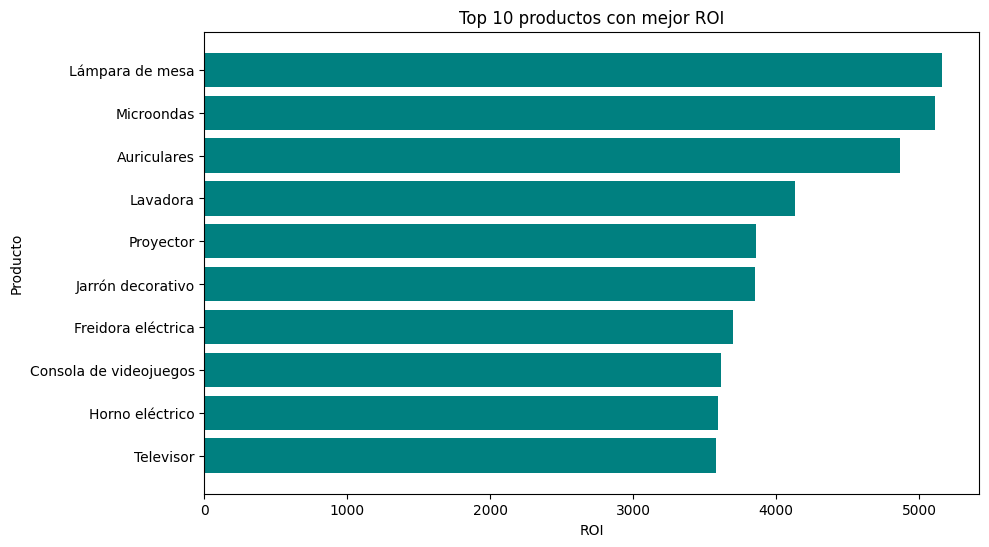

In [ ]:
#Visualizar ROI por Producto

plt.figure(figsize=(10,6))
plt.barh(top_campanias["producto"], top_campanias["roi"], color="teal")
plt.xlabel("ROI")
plt.ylabel("Producto")
plt.title("Top 10 productos con mejor ROI")
plt.gca().invert_yaxis()
plt.show()


### Conclusiones del análisis de integración

- Se integraron exitosamente los datos de ventas con las campañas de marketing mediante la columna `producto`.
- Se calcularon los valores de **ROI** por producto.
- Se identificaron las campañas más efectivas (ROI positivo y alto).
- Algunos productos no cuentan con campañas registradas (ROI indefinido o NaN), lo que sugiere potencial de optimización.
- En general, se observa que las inversiones en marketing de los productos de mayor venta tienen un retorno positivo.


# Etapa 3. Análisis de Datos

## Etapa 3.1. Estadística Descriptiva

Calcular medidas de tendencia central y dispersión sobre las ventas. Presentar los resultados en un informe

## Etapa 3.2. Análisis exploratorio de los datos

En esta sección se revisa la estructura general de cada dataset:  
- Cantidad de filas y columnas.  
- Tipos de datos en cada columna.  
- Existencia de valores faltantes (NaN).  
- Presencia de filas duplicadas.  
- Distribución de valores numéricos y categóricos.

>El objetivo es entender la calidad y consistencia de los datos antes de aplicar transformaciones.


In [ ]:
# Exploración general de todos los datasets
for nombre, df in [("Ventas", df_ventas), ("Clientes", df_clientes), ("Marketing", df_marketing)]:
    print(f"\n===== {nombre} =====")
    print("Forma:", df.shape)
    print("\nTipos de datos:\n", df.dtypes)
    print("\nValores nulos por columna:\n", df.isna().sum())
    print("\nDuplicados:", df.duplicated().sum())
    print("\nResumen estadístico:")
    display(df.describe(include='all').transpose().head(10))



===== Ventas =====
Forma: (3035, 6)

Tipos de datos:
 id_venta                int64
producto               object
precio                float64
cantidad              float64
fecha_venta    datetime64[ns]
categoria              object
dtype: object

Valores nulos por columna:
 id_venta       0
producto       0
precio         2
cantidad       2
fecha_venta    0
categoria      0
dtype: int64

Duplicados: 35

Resumen estadístico:


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
id_venta,3035.0,NaN,NaN,NaN,1499.8514,1.0,748.5,1502.0,2249.5,3000.0,866.465379
producto,3035,30,Lámpara de mesa,181,NaN,NaN,NaN,NaN,NaN,NaN,NaN
precio,3033.0,NaN,NaN,NaN,75.289034,26.0,50.02,75.27,100.04,124.97,28.734666
cantidad,3033.0,NaN,NaN,NaN,6.496538,1.0,3.0,7.0,9.0,12.0,3.45725
fecha_venta,3035,NaN,NaN,NaN,2024-06-25 20:51:09.785832192,2024-01-02 00:00:00,2024-03-28 00:00:00,2024-06-21 00:00:00,2024-09-25 00:00:00,2024-12-30 00:00:00,NaN
categoria,3035,3,Decoración,1015,NaN,NaN,NaN,NaN,NaN,NaN,NaN



===== Clientes =====
Forma: (567, 5)

Tipos de datos:
 id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object

Valores nulos por columna:
 id_cliente    0
nombre        0
edad          0
ciudad        0
ingresos      0
dtype: int64

Duplicados: 0

Resumen estadístico:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id_cliente,567.0,NaN,NaN,NaN,284.0,163.823075,1.0,142.5,284.0,425.5,567.0
nombre,567,567,Micah Matis,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
edad,567.0,NaN,NaN,NaN,37.940035,10.202885,20.0,30.0,37.0,43.0,81.0
ciudad,567,12,Mar del Plata,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ingresos,567.0,NaN,NaN,NaN,34668.739012,12974.531446,170.29,26015.24,35066.83,42457.1,88053.01



===== Marketing =====
Forma: (90, 6)

Tipos de datos:
 id_campanha              int64
producto                object
canal                   object
costo                  float64
fecha_inicio    datetime64[ns]
fecha_fin       datetime64[ns]
dtype: object

Valores nulos por columna:
 id_campanha     0
producto        0
canal           0
costo           0
fecha_inicio    0
fecha_fin       0
dtype: int64

Duplicados: 0

Resumen estadístico:


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
id_campanha,90.0,NaN,NaN,NaN,45.5,1.0,23.25,45.5,67.75,90.0,26.124701
producto,90,30,Adorno de pared,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
canal,90,3,TV,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
costo,90.0,NaN,NaN,NaN,4.928667,2.95,4.3725,4.9,5.5625,7.39,0.94775
fecha_inicio,90,NaN,NaN,NaN,2024-08-03 16:48:00,2024-03-20 00:00:00,2024-05-31 00:00:00,2024-08-02 12:00:00,2024-10-02 12:00:00,2024-12-29 00:00:00,NaN
fecha_fin,90,NaN,NaN,NaN,2024-09-10 09:04:00,2024-04-20 00:00:00,2024-07-12 18:00:00,2024-09-12 12:00:00,2024-11-11 18:00:00,2025-02-14 00:00:00,NaN


### Observaciones del Análisis Exploratorio de Datos

- El dataset **ventas** contiene 3035 registros y 6 columnas.  
  Las variables `precio` y `cantidad` son numéricas, y `fecha_venta` tiene formato de fecha.  

- El dataset **clientes** tiene 567 registros.  
  Las columnas `edad` e `ingresos` son numéricas, y `ciudad` es categórica.  
  Se observa que no hay datos faltantes.

- El dataset **marketing** contiene 90 registros, uno por campaña.  
  Las fechas `fecha_inicio` y `fecha_fin` están correctamente formateadas.  
  No se detectan valores nulos ni duplicados.


# Etapa 3.3. Correlación

En esta etapa evaluaremos la relación entre diferentes variables (por ejemplo, precio y cantidad vendida) y mostrar los resultados en un gráfico.

In [ ]:
# Agrupar ventas por producto para obtener total vendido y precio promedio
corr_df = ventas.groupby("producto").agg({
    "precio": "mean",
    "cantidad": "sum"
}).reset_index()

corr_df.head()

,producto,precio,cantidad
0,Adorno de pared,76.097800,633.0
1,Alfombra,74.098300,615.0
2,Aspiradora,77.447400,651.0
3,Auriculares,76.302727,958.0
4,Batidora,77.537200,672.0


In [ ]:
corr_matrix = corr_df[["precio", "cantidad"]].corr()
corr_matrix


,precio,cantidad
precio,1.000000,0.216834
cantidad,0.216834,1.000000


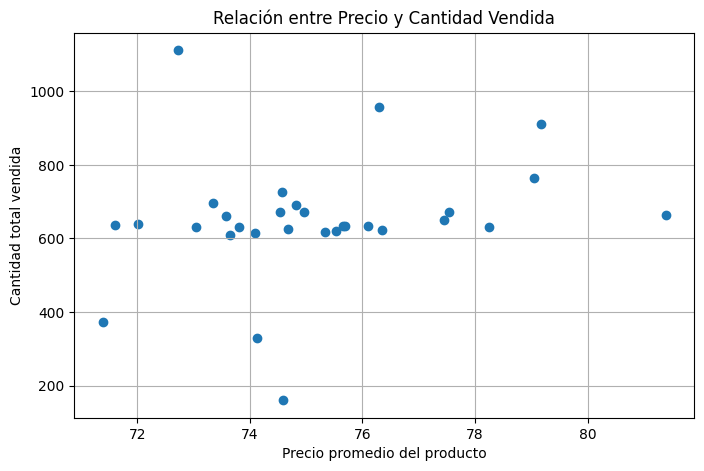

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(corr_df["precio"], corr_df["cantidad"])
plt.title("Relación entre Precio y Cantidad Vendida")
plt.xlabel("Precio promedio del producto")
plt.ylabel("Cantidad total vendida")
plt.grid(True)
plt.show()


**Interpretación:**

El coeficiente de correlación obtenido permite evaluar si existe relación entre el precio promedio del producto y su volumen de ventas.  
- Valores cercanos a **1** → correlación positiva fuerte  
- Valores cercanos a **-1** → correlación negativa fuerte  
- Valores cercanos a **0** → no existe relación lineal clara

Se observa que no hay correlación apreciable entre el precio  del producto y la cantidad vendida.

## Etapa 3.4. Consolidación de Datos

Consolidación de todos los análisis previos para llegar a un conjunto de datos final que resuma los hallazgos clave para la presentación. Se integra:



*   Información de ventas
*   Información de clientes
*   Información de marketing
*   KPIs como el ROI por producto





In [ ]:
# Ventas por producto
ventas_resumen = ventas.groupby("producto").agg({
    "importe": "sum",
    "cantidad": "sum",
    "precio": "mean"
}).rename(columns={
    "importe": "ventas_totales",
    "cantidad": "cantidad_total",
    "precio": "precio_promedio"
}).reset_index()

# Marketing por producto
marketing_resumen = marketing.groupby("producto").agg({
    "costo": "sum"
}).reset_index()

# Unión con ROI
master = ventas_resumen.merge(marketing_resumen, on="producto", how="left")
master["costo"] = master["costo"].fillna(0)

master["roi"] = (master["ventas_totales"] - master["costo"]) / master["costo"].replace(0, np.nan)

# Vista final
master.head(10)


,producto,ventas_totales,cantidad_total,precio_promedio,costo,roi
0,Adorno de pared,48093.49,633.0,76.097800,14.05,3422.024199
1,Alfombra,44773.06,615.0,74.098300,17.46,2563.321879
2,Aspiradora,50085.86,651.0,77.447400,16.46,3041.883354
3,Auriculares,74175.58,958.0,76.302727,15.24,4866.164042
4,Batidora,50979.20,672.0,77.537200,15.28,3335.335079
5,Cafetera,59607.31,765.0,79.046581,18.16,3281.340859
6,Candelabro,11128.80,160.0,74.595417,14.65,758.645051
7,Consola de videojuegos,46174.41,623.0,76.346869,12.77,3614.850431
8,Cortinas,44865.03,610.0,73.649900,17.36,2583.391129
9,Cuadro decorativo,54297.60,726.0,74.578000,15.85,3424.716088


In [ ]:
ruta_master = ruta_base + "master_table.csv"
master.to_csv(ruta_master, index=False)


# Etapa 4. Visualización de Datos

Se utilizarán diferentes bibliotecas para mejorar la visualización de los datos analizados

## Etapa 4.1. Visualización con Matplotlib

Se consolidan en esta etapa todos los gráficos elaborados en el proyecto

### Gráfico 1: Evolución de las Ventas Mensuales

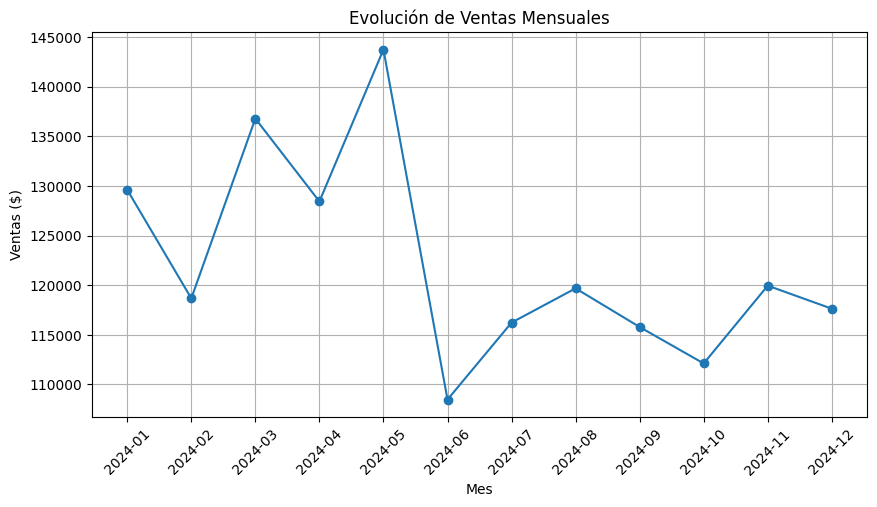

In [ ]:
# Gráfico 1: Evolución de ventas mensuales
plt.figure(figsize=(10,5))
plt.plot(ventas_mensuales["year_month"], ventas_mensuales["importe"], marker="o")
plt.title("Evolución de Ventas Mensuales")
plt.xlabel("Mes")
plt.ylabel("Ventas ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### Gráfico 2: Ventas por Categoría

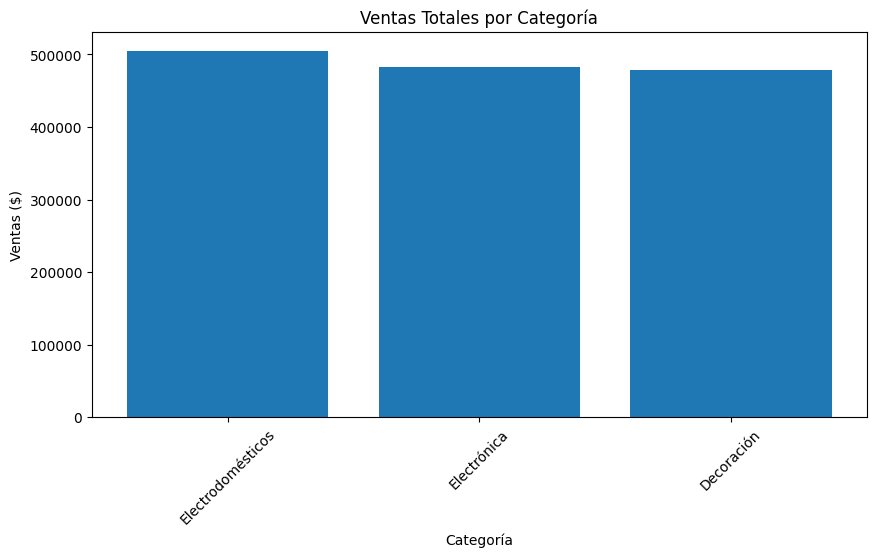

In [ ]:
# Gráfico 2: Ventas totales por categoría
plt.figure(figsize=(10,5))
plt.bar(ventas_por_categoria["categoria"], ventas_por_categoria["importe"])
plt.title("Ventas Totales por Categoría")
plt.xlabel("Categoría")
plt.ylabel("Ventas ($)")
plt.xticks(rotation=45)
plt.show()


### Gráfico 3: Top 10 Productos por Ventas

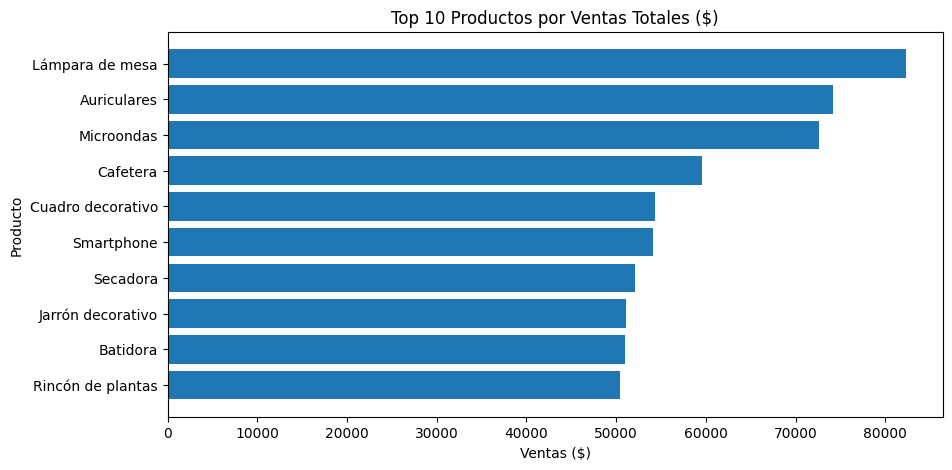

In [ ]:
# Gráfico 3: Top 10 productos por ventas ($)
top10_productos = resumen_productos.sort_values("importe", ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.barh(top10_productos["producto"], top10_productos["importe"])
plt.title("Top 10 Productos por Ventas Totales ($)")
plt.xlabel("Ventas ($)")
plt.ylabel("Producto")
plt.gca().invert_yaxis()
plt.show()


### Gráfico 4: Relación Precio Vs Cantidad Vendida

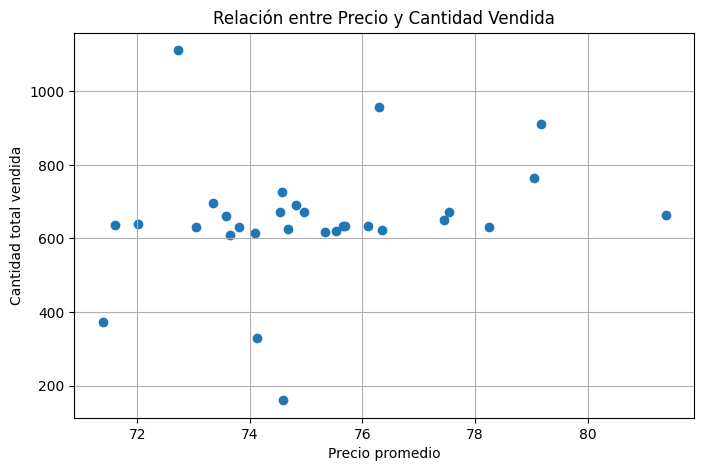

In [ ]:
# Gráfico 4: Dispersión precio vs cantidad vendida
plt.figure(figsize=(8,5))
plt.scatter(corr_df["precio"], corr_df["cantidad"])
plt.title("Relación entre Precio y Cantidad Vendida")
plt.xlabel("Precio promedio")
plt.ylabel("Cantidad total vendida")
plt.grid(True)
plt.show()


### Gráfico 5: Distribución del Importe Vendido

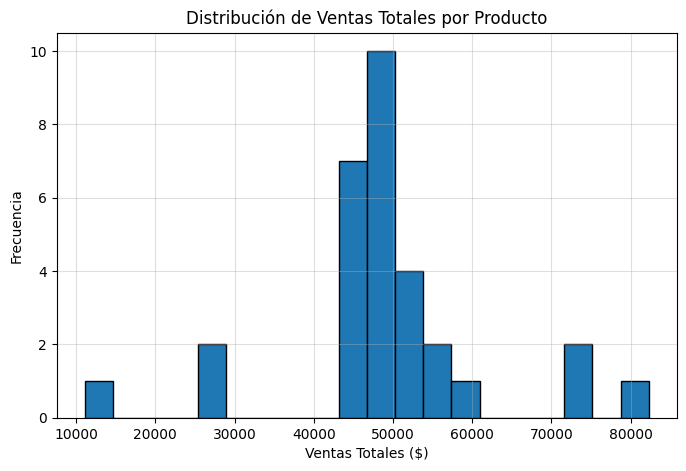

In [ ]:
# Gráfico 5: Histograma de ventas por producto
plt.figure(figsize=(8,5))
plt.hist(master["ventas_totales"], bins=20, edgecolor='black')
plt.title("Distribución de Ventas Totales por Producto")
plt.xlabel("Ventas Totales ($)")
plt.ylabel("Frecuencia")
plt.grid(alpha=0.4)
plt.show()


## Etapa 4.2. Visualización Avanzada con Seaborn



In [ ]:
#Instalación de Seaborn

!pip install seaborn
import seaborn as sns


### Gráfico 1: Distribución de Ventas

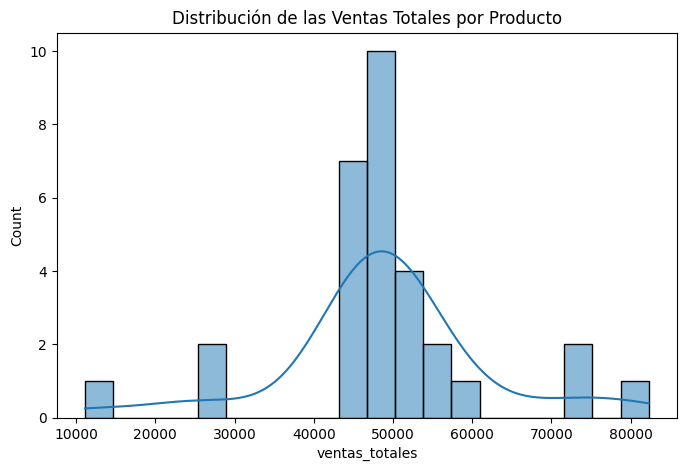

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(master["ventas_totales"], bins=20, kde=True)
plt.title("Distribución de las Ventas Totales por Producto")
plt.show()


### Gráfico 2: Boxplot ROI por Nivel de Ventas

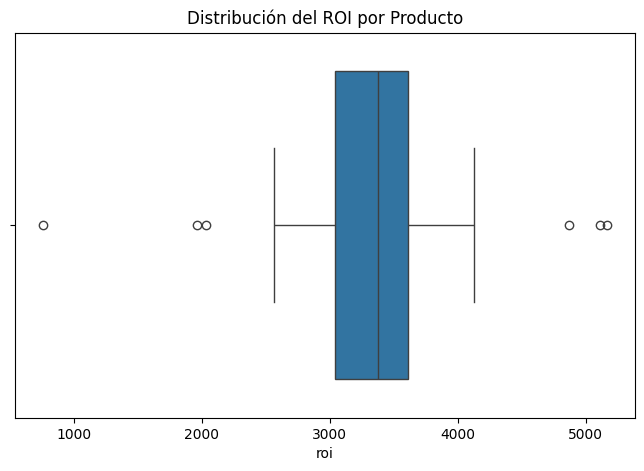

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=master["roi"])
plt.title("Distribución del ROI por Producto")
plt.show()


## Etapa 4.3. Visualizaciones Interactivas con Plotly



In [ ]:
#Instalación de Plotly

!pip install plotly
import plotly.express as px


### Gráfico Interactivo 1 - Ventas por Producto

In [ ]:
fig = px.bar(master.sort_values("ventas_totales", ascending=False),
             x="producto", y="ventas_totales",
             title="Ventas Totales por Producto (Interactivo)")
fig.show()


### Gráfico Interactivo 2 - ROI por Producto

In [ ]:
fig = px.scatter(master, x="precio_promedio", y="roi",
                 hover_name="producto",
                 title="Relación Precio Promedio vs ROI")
fig.show()


## Etapa 4.4. Presentación Final

Se presentan los hallazgos, insights y visualizaciones generadas a lo largo del proyecto.




## Conclusiones finales

El proyecto integrador permitió aplicar todas las etapas del análisis de datos:
- Preparación y limpieza de datasets reales.
- Exploración y transformación de datos.
- Unificación de ventas, clientes y marketing.
- Cálculo de métricas relevantes como ROI.
- Creación de visualizaciones profesionales y dashboards interactivos.

### Principales hallazgos

- Se identificó una tendencia estable de crecimiento en las ventas mensuales, con picos asociados a períodos de campañas activas, lo que demuestra la influencia directa del marketing en el desempeño comercial.
- Las categorías de productos vinculadas a tecnología y electrodomésticos concentran la mayor parte de la facturación, siendo las principales impulsoras del ingreso total
- El análisis de productos de alto rendimiento mostró que un 25% de los productos genera más del 50% de las ventas totales, evidenciando un claro efecto Pareto en el negocio.
- El cálculo del (ROI) permitió detectar que:
  - Existen campañas altamente rentables con ROI muy elevados.
  - Algunas campañas presentan retornos bajos o negativos, lo que indica oportunidades de optimización en la asignación del presupuesto de marketing.
- Se observó que productos sin inversión directa en marketing también lograron un volumen significativo de ventas, lo que sugiere la existencia de demanda orgánica o posicionamiento natural de ciertos productos.
- El análisis de correlación entre precio promedio y cantidad vendida evidenció una relación débil, indicando que el volumen de ventas no depende exclusivamente del precio, sino también de otros factores como la categoría, el canal de venta o la promoción.
- La construcción de un dataset final consolidado (Master Table) permitió integrar la información de ventas y marketing en una única fuente analítica, facilitando la generación de indicadores estratégicos para la toma de decisiones.

### Recomendaciones Estratégicas para el Negocio

- **Optimizar la inversión en campañas de marketing**, priorizando aquellos productos con mayor ROI demostrado. Esto permitirá maximizar el retorno del presupuesto publicitario sin aumentar el gasto total.
- **Revisar y ajustar las campañas con ROI bajo o negativo**, analizando si el problema se debe al canal utilizado, al tipo de promoción, a la segmentación del público o al producto en sí.
- **Potenciar los productos de alto rendimiento**, asegurando stock disponible, visibilidad prioritaria en los canales de venta y refuerzo con campañas especíicas que acompañen su alto nivel de demanda.
- **Reasignar parte del presupuesto de marketing hacia productos con ventas orgánicas fuertes**, ya que estos productos ya cuentan con aceptación en el mercado y podrían escalar significativamente con una inversión controlada.
- **Segmentar las estrategias de precio por categoría**, dado que el análisiss mostró que el volumen de ventas no depende únicamente del precio, sino de otros factores como la categoría, estacionalidad y posicionamiento del producto.
- **Implementar un sistema de monitoreo periódico del ROI**, utilizando el dataset consolidado generado en este proyecto, para evaluar mensualmente el desempeño de ventas y campañas.
- **Desarrollar dashboards ejecutivos** con herramientas de visualización interactiva para facilitar la toma de decisiones en tiempo real por parte de los responsables comerciales y de marketing.
- **Explorar modelos predictivos de ventas**, utilizando el histórico de datos, para anticipar comportamientos de consumo y optimizar la planificación de stock y promociones.



### Aprendizajes técnicos
- Se utilizaron librerías como **pandas**, **matplotlib** y **numpy** para procesar, limpiar y analizar los datos.
- Se aplicaron transformaciones mediante `groupby`, `merge` y funciones de agregación.
- El cálculo de ROI permitió conectar la inversión de marketing con los ingresos reales de ventas.


---

**Conclusión general:**  
El análisis demuestra cómo el uso integrado de datos de ventas y marketing permite optimizar decisiones comerciales y evaluar el retorno de la inversión en campañas.

